In [65]:
import pickle
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [73]:
df:pandas.DataFrame = None
with open("covid_flow.pkl", "rb") as f:
    df = pickle.load(f)
df["case"] = df.index
df["t_point"] = df["t_point"].apply(lambda x: x[2:])
df["t_point"] = df["t_point"].apply(lambda x: int(x))
df.set_index(["case", "t_point"], inplace=True)
df = df.sort_values(["case", "t_point"])
df.head()

омепразол_stat_control  надропарин кальция_stat_control  \
case    t_point                                                            
GACAAcY 0                             1                                1   
        1                             1                                1   
        2                             1                                1   
        3                             1                                1   
GACAAnf 0                             1                                1   

                 эзомепразол_stat_control  амлодипин_stat_control  \
case    t_point                                                     
GACAAcY 0                               1                       1   
        1                               1                       1   
        2                               1                       1   
        3                               1                       1   
GACAAnf 0                               1                       1   

                 амброксол_stat_control  домперидон_stat_control  \
case    t_point                                                    
GACAAcY 0                             1                        1   
        1                             1                        1   
        2                             1                        1   
        3                             1                        1   
GACAAnf 0                             1                        1   

                 меброфенин_stat_control  технеций_stat_control  \
case    t_point                                                   
GACAAcY 0                              1                      1   
        1                              1                      1   
        2                              1                      1   
        3                              1                      1   
GACAAnf 0                              1                      1   

                 мометазон_stat_control  бисопролол_stat_control  ...  \
case    t_point                                                   ...   
GACAAcY 0                             1                        1  ...   
        1                             1                        1  ...   
        2                             1                        1  ...   
        3                             1                        1  ...   
GACAAnf 0                             1                        1  ...   

                 трансфузия_dinam_control  оксигенотерапия_dinam_control  \
case    t_point                                                            
GACAAcY 0                               0                              1   
        1                               0                              1   
        2                               0                              1   
        3                               0                              1   
GACAAnf 0                               0                              0   

                 НИВЛ_dinam_control  ИВЛ_dinam_control  long_observation_tar  \
case    t_point                                                                
GACAAcY 0                         0                  0                    22   
        1                         0                  0                    22   
        2                         0                  0                    22   
        3                         0                  0                    22   
GACAAnf 0                         0                  0                     6   

                 outcome_tar  process_stages  current_process_duration  \
case    t_point                                                          
GACAAcY 0                  0               2                         3   
        1                  0               2                        10   
        2                  0               2                        17   
        3                  0               2                        24   
GAC

убираем лишние строчки и оставляем нужные нам фичи для предсказаний

In [50]:
st = df.groupby("case").size()
st_idx = st[st==4].index

In [72]:
st = df.groupby("case").size()
st_idx = st[st==4].index
real = []
targ = []
for i in st_idx[0:12]:
    real.append(df.loc[(i, 0):(i,2)].iloc[:, :46])
    targ.append(df.loc[(i, 3):(i, 3)].iloc[:46])
real = pandas.concat(real)
targ = pandas.concat(targ)
real.to_csv("./example/input.csv")
targ.to_csv("./example/test.csv")


In [33]:
tt = pandas.read_csv("./example/input.csv", index_col=["case", "t_point"])
tt

омепразол_stat_control  надропарин кальция_stat_control  \
case    t_point                                                            
GACABsT 0                             1                                1   
        1                             1                                1   
        2                             1                                1   
GACACKP 0                             0                                0   
        1                             0                                0   
...                                 ...                              ...   
GACBAщн 1                             1                                0   
        2                             1                                0   
GACXAAB 0                             1                                0   
        1                             1                                0   
        2                             1                                0   

                 эзомепразол_stat_control  амлодипин_stat_control  \
case    t_point                                                     
GACABsT 0                               1                       0   
        1                               1                       0   
        2                               1                       0   
GACACKP 0                               0                       1   
        1                               0                       1   
...                                   ...                     ...   
GACBAщн 1                               1                       0   
        2                               1                       0   
GACXAAB 0                               1                       1   
        1                               1                       1   
        2                               1                       1   

                 амброксол_stat_control  домперидон_stat_control  \
case    t_point                                                    
GACABsT 0                             1                        1   
        1                             1                        1   
        2                             1                        1   
GACACKP 0                             0                        0   
        1                             0                        0   
...                                 ...                      ...   
GACBAщн 1                             0                        1   
        2                             0                        1   
GACXAAB 0                             0                        1   
        1                             0                        1   
        2                             0                        1   

                 меброфенин_stat_control  технеций_stat_control  \
case    t_point                                                   
GACABsT 0                              1                      1   
        1                              1                      1   
        2                              1                      1   
GACACKP 0                              0                      0   
        1                              0                      0   
...                                  ...                    ...   
GACBAщн 1                              1                      1   
        2                              1                      1   
GACXAAB 0                              1                      1   
        1                              1                      1   
        2                              1                      1   

                 мометазон_stat_control  бисопролол_stat_control  ...  \
case    t_point                                                   ...   
GACABsT 0                             1                        0  ...   
        1                             1                        0  ...   
        2                             1                        0  ...   
GACACKP 

In [12]:
dinam_fact_df = df.iloc[:, 29:42]
dinam_fact_df.head()

Температура_dinam_fact  Лимфоциты#_dinam_fact  \
case    t_point                                                  
GACAAcY 0                          36.7                   1.93   
        1                          36.3                   2.00   
        2                          36.6                   2.13   
        3                          36.5                   2.12   
GACAAnf 0                           NaN                   1.21   

                 АСТ_dinam_fact  ЧСС_dinam_fact  ЧДД_dinam_fact  \
case    t_point                                                   
GACAAcY 0                  27.9            74.0            24.0   
        1                  25.7            71.0            19.0   
        2                  32.0             NaN            18.0   
        3                  27.0            71.0            18.0   
GACAAnf 0                  20.7            55.0            22.0   

                 Билирубин общий_dinam_fact  \
case    t_point                               
GACAAcY 0                              15.3   
        1                              12.1   
        2                               NaN   
        3                               NaN   
GACAAnf 0                               7.8   

                 MPV- Средн.объем тромбоцитов_dinam_fact  \
case    t_point                                            
GACAAcY 0                                           11.2   
        1                                           10.6   
        2                                           11.0   
        3                                           11.4   
GACAAnf 0                                            8.1   

                 PCT- Тромбокрит_dinam_fact  Лимфоциты%_dinam_fact  \
case    t_point                                                      
GACAAcY 0                             0.100                   48.3   
        1                             0.160                   30.7   
        2                             0.190                   23.1   
        3                             0.100                   24.1   
GACAAnf 0                             0.201                   24.1   

                 снижение_сознания_dinam_fact  \
case    t_point                                 
GACAAcY 0                                   0   
        1                                   0   
        2                                   0   
        3                                   0   
GACAAnf 0                                   0   

                 Cтепень тяжести по КТ_dinam_fact  \
case    t_point                                     
GACAAcY 0                                       2   
        1                                       2   
        2                                       5   
        3                                       5   
GACAAnf 0                                       1   

                 Лактатдегидрогеназа_dinam_fact  \
case    t_point                                   
GACAAcY 0                                 245.0   
        1                                 315.0   
        2                                 290.0   
        3                                 274.0   
GACAAnf 0                                 189.0   

                 PDW- Индекс расп.по объему тр._dinam_fact  
case    t_point                                             
GACAAcY 0                                             14.0  
        1                                             12.8  
        2                                             13.5  
        3                                             13.1  
GACAAnf 0                                             17.7

<AxesSubplot: >

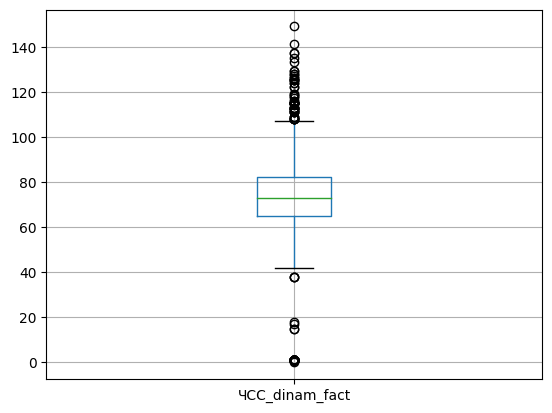

In [50]:
dinam_fact_df.boxplot("ЧСС_dinam_fact")

array([[<AxesSubplot: title={'center': 'Температура_dinam_fact'}>]],
      dtype=object)

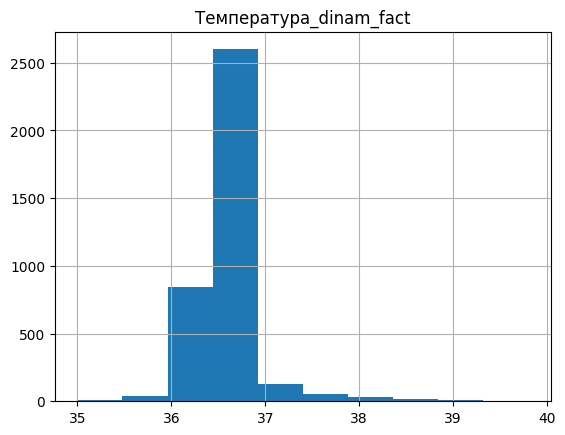

In [30]:
dinam_fact_df.hist("Температура_dinam_fact")

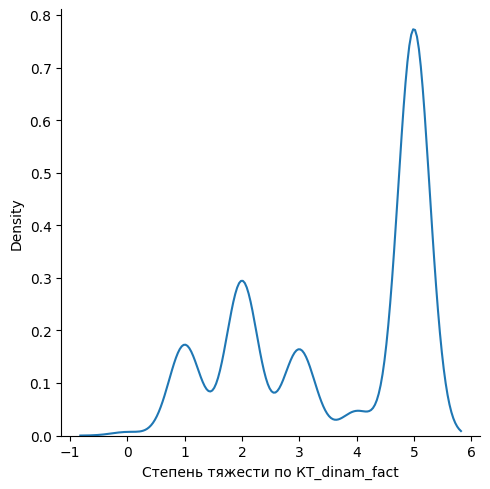

In [38]:
seaborn.displot(dinam_fact_df["Cтепень тяжести по КТ_dinam_fact"], kind="kde")

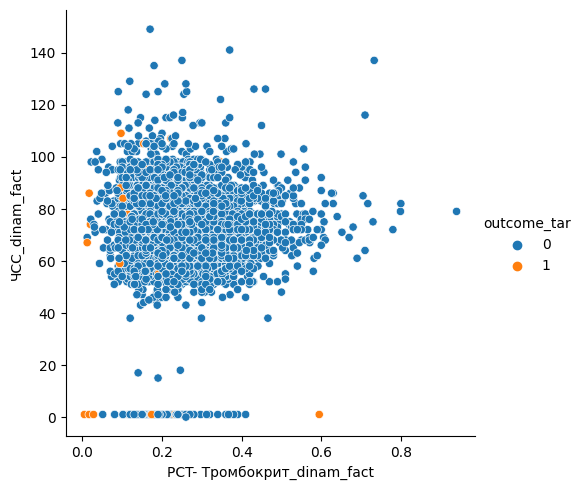

In [48]:
seaborn.relplot(kind="scatter", x=dinam_fact_df["PCT- Тромбокрит_dinam_fact"], y=dinam_fact_df["ЧСС_dinam_fact"], hue=df["outcome_tar"])

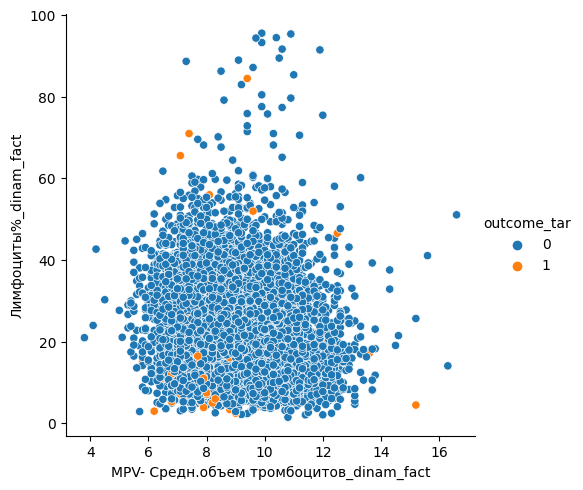

In [47]:
seaborn.relplot(kind="scatter", x=dinam_fact_df["MPV- Средн.объем тромбоцитов_dinam_fact"], y=dinam_fact_df["Лимфоциты%_dinam_fact"], hue=df["outcome_tar"])

Looks interesting. only one(!) value equals to one presents in data frame

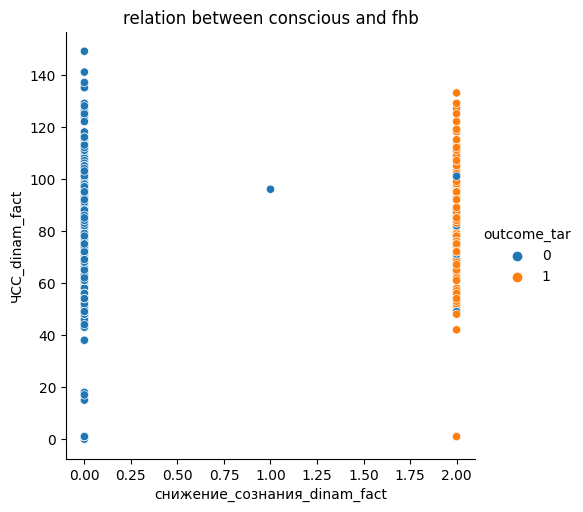

In [45]:
g = seaborn.relplot(kind="scatter", x=dinam_fact_df["снижение_сознания_dinam_fact"], y=dinam_fact_df["ЧСС_dinam_fact"], hue=df["outcome_tar"])
g.set(title="relation between conscious and fhb")

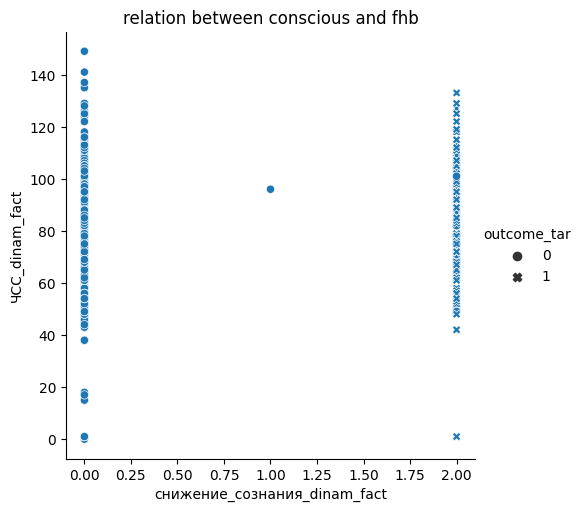

In [49]:
g = seaborn.relplot(kind="scatter", x=dinam_fact_df["снижение_сознания_dinam_fact"], y=dinam_fact_df["ЧСС_dinam_fact"], style=df["outcome_tar"])
g.set(title="relation between conscious and fhb")

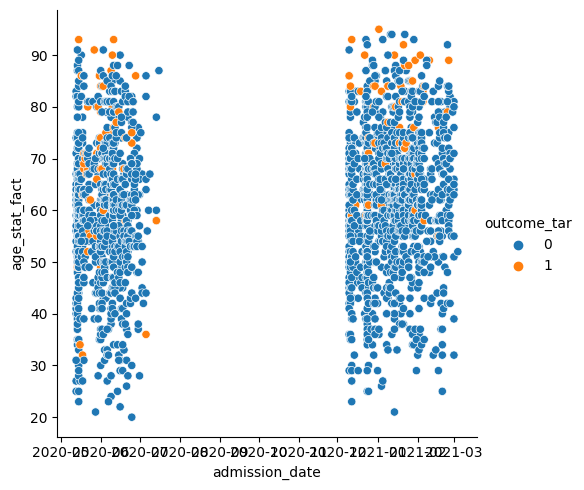

In [88]:
stat = df.groupby("case").first()
g = seaborn.relplot(kind="scatter", x=stat["admission_date"], y=stat["age_stat_fact"], hue=stat["outcome_tar"])

In [105]:
stat = df.groupby("case").first()


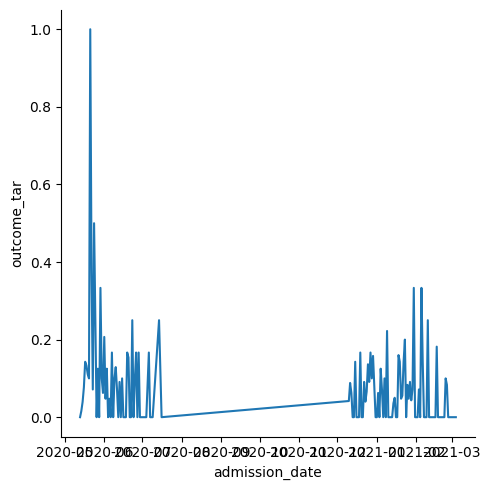

In [101]:
plt.histplot(x=df_ts.index, y=df_ts["outcome_tar"])

In [63]:
with open("columns_target.txt", 'r') as f:
    l = f.read().split("\n")
    print(l)

['Температура_dinam_fact', 'Лимфоциты#_dinam_fact', 'АСТ_dinam_fact', 'ЧСС_dinam_fact', 'ЧДД_dinam_fact', 'Билирубин общий_dinam_fact', 'MPV- Средн.объем тромбоцитов_dinam_fact', 'PCT- Тромбокрит_dinam_fact', 'Лимфоциты%_dinam_fact', 'снижение_сознания_dinam_fact', 'Cтепень тяжести по КТ_dinam_fact', 'Лактатдегидрогеназа_dinam_fact', 'PDW- Индекс расп.по объему тр._dinam_fact']


In [60]:
with open("columns_target.txt", "w") as f:
    f.write("\n".join(df.iloc[:, 29:42].columns))

In [69]:
a = np.array([[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4],
[0, 12, 3, 4]]
)
a.reshape((-1, 3, 4))

array([[[ 0, 12,  3,  4],
        [ 0, 12,  3,  4],
        [ 0, 12,  3,  4]],

       [[ 0, 12,  3,  4],
        [ 0, 12,  3,  4],
        [ 0, 12,  3,  4]],

       [[ 0, 12,  3,  4],
        [ 0, 12,  3,  4],
        [ 0, 12,  3,  4]]])